In [11]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import pi, e, sin, cos
from numpy.fft import fft, fftshift

plt.rcParams.update({"axes.grid": True})

### Modulação FM

In [20]:
fi = int(15e3)  # Frequencia do sinal
ti = 1 / fi  # Periodo de amostragem
Ac = 1  # Amplitude da portadora
fc = int(150e3)  # Frequencia da portadora
tc = 1 / fc  # Periodo da portadora

fs = 50 * fc  # Frequencia de amostragem
ts = 1 / fs  # Periodo de amostragem
t = np.arange(0, 1, ts)  # Vetor tempo
f = np.arange(-fs / 2, fs / 2, 1)  # Vetor frequencia

si_t = sin(2 * pi * fi * t)  # Sinal de entrada
Si_f = fftshift(fft(si_t))  # Sinal de entrada na frequencia

kfm = int(75e3)  # Desvio de frequencia em Hz
k0 = 2 * pi * kfm  # Desvio de frequencia em rad/s

theta_hat_t = k0 * np.cumsum(si_t) * ts  # Sinal integrado 0 a t

c_t = Ac * cos(2 * pi * fc * t + theta_hat_t)  # Sinal modulado
C_f = fftshift(fft(c_t))  # Sinal modulado na frequencia

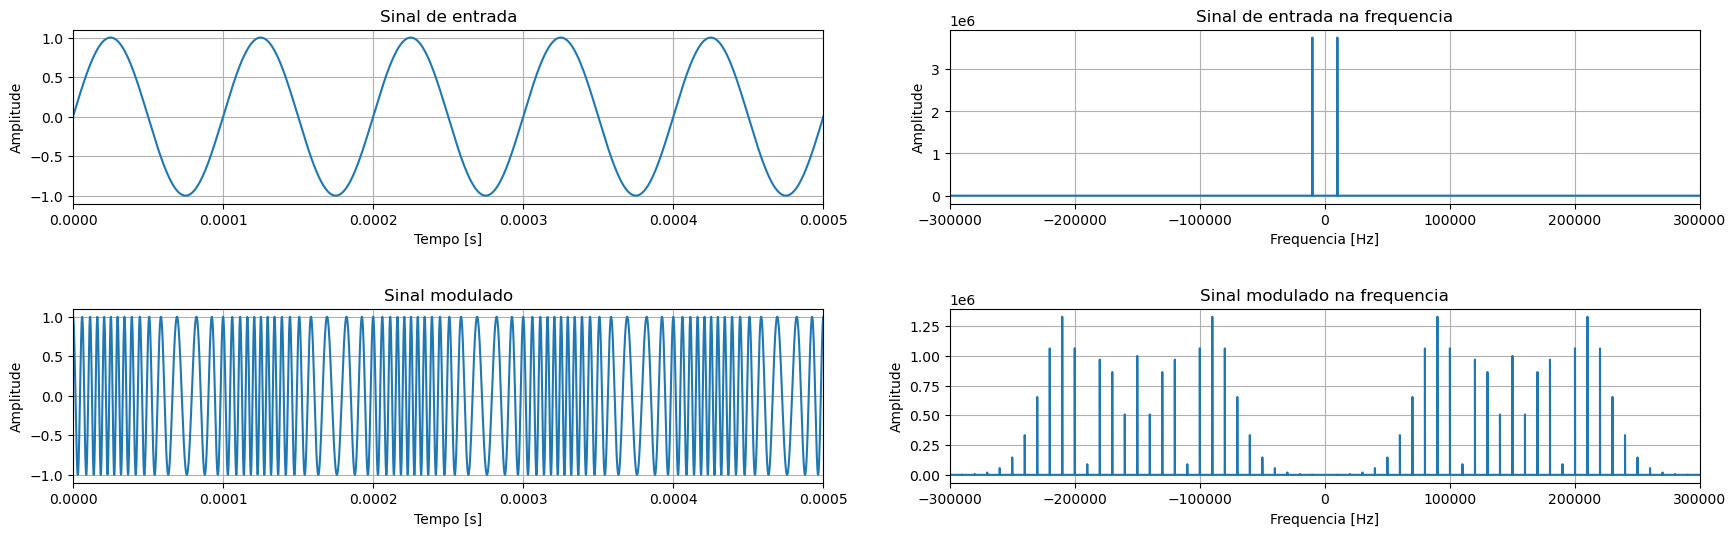

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(18, 6))

axs[0, 0].plot(t, si_t)
axs[0, 0].set_title("Sinal de entrada")
axs[0, 0].set_xlabel("Tempo [s]")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].set_xlim(0, 5 * ti)

axs[0, 1].plot(f, np.abs(Si_f))
axs[0, 1].set_title("Sinal de entrada na frequencia")
axs[0, 1].set_xlabel("Frequencia [Hz]")
axs[0, 1].set_ylabel("Amplitude")
axs[0, 1].set_xlim(-2 * fc, 2 * fc)

axs[1, 0].plot(t, c_t)
axs[1, 0].set_title("Sinal modulado")
axs[1, 0].set_xlabel("Tempo [s]")
axs[1, 0].set_ylabel("Amplitude")
axs[1, 0].set_xlim(0, 5 * ti)

axs[1, 1].plot(f, np.abs(C_f))
axs[1, 1].set_title("Sinal modulado na frequencia")
axs[1, 1].set_xlabel("Frequencia [Hz]")
axs[1, 1].set_ylabel("Amplitude")
axs[1, 1].set_xlim(-2 * fc, 2 * fc)

plt.tight_layout(pad=3.0)
plt.show()

### Demodulador FM

In [26]:
si_hat_t = np.diff(c_t) * fs / k0
si_hat_t = np.append(si_hat_t, 0)  # Sinal demodulado

Si_hat_f = fftshift(fft(si_hat_t))  # Sinal demodulado na frequencia

# TODO: Detectar envoltória

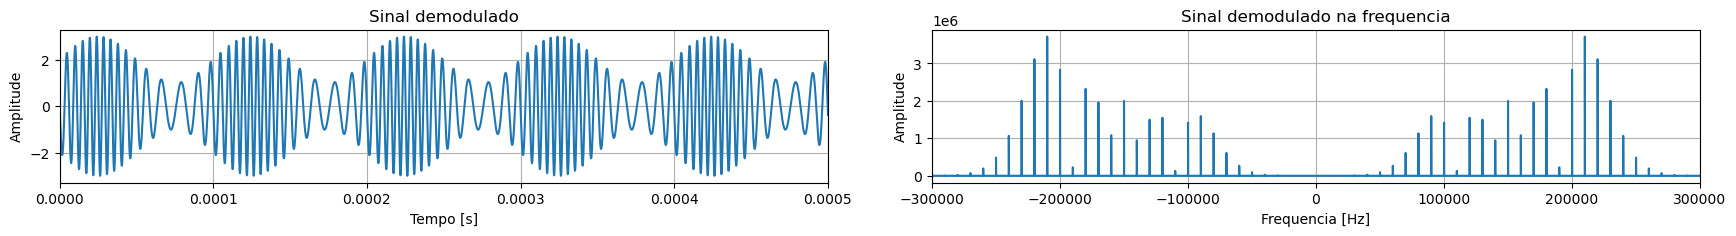

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(18, 3))

axs[0].plot(t, si_hat_t)
axs[0].set_title("Sinal demodulado")
axs[0].set_xlabel("Tempo [s]")
axs[0].set_ylabel("Amplitude")
axs[0].set_xlim(0, 5 * ti)

axs[1].plot(f, np.abs(Si_hat_f))
axs[1].set_title("Sinal demodulado na frequencia")
axs[1].set_xlabel("Frequencia [Hz]")
axs[1].set_ylabel("Amplitude")
axs[1].set_xlim(-2 * fc, 2 * fc)

plt.tight_layout(pad=3.0)
plt.show()

### Usando áudio

In [16]:
from scipy.io import wavfile

In [17]:
fs, si_t = wavfile.read("./data/audio-1.wav")
ts = 1 / fs
Si_f = fftshift(fft(si_t))

t = np.linspace(0, len(si_t) / fs, num=len(si_t))
f = np.linspace(-fs / 2, fs / 2, num=len(si_t))

theta_hat_t = np.cumsum(k0 * si_t) * ts

c_t = Ac * cos(2 * pi * fc * t + theta_hat_t)
C_f = fftshift(fft(c_t))

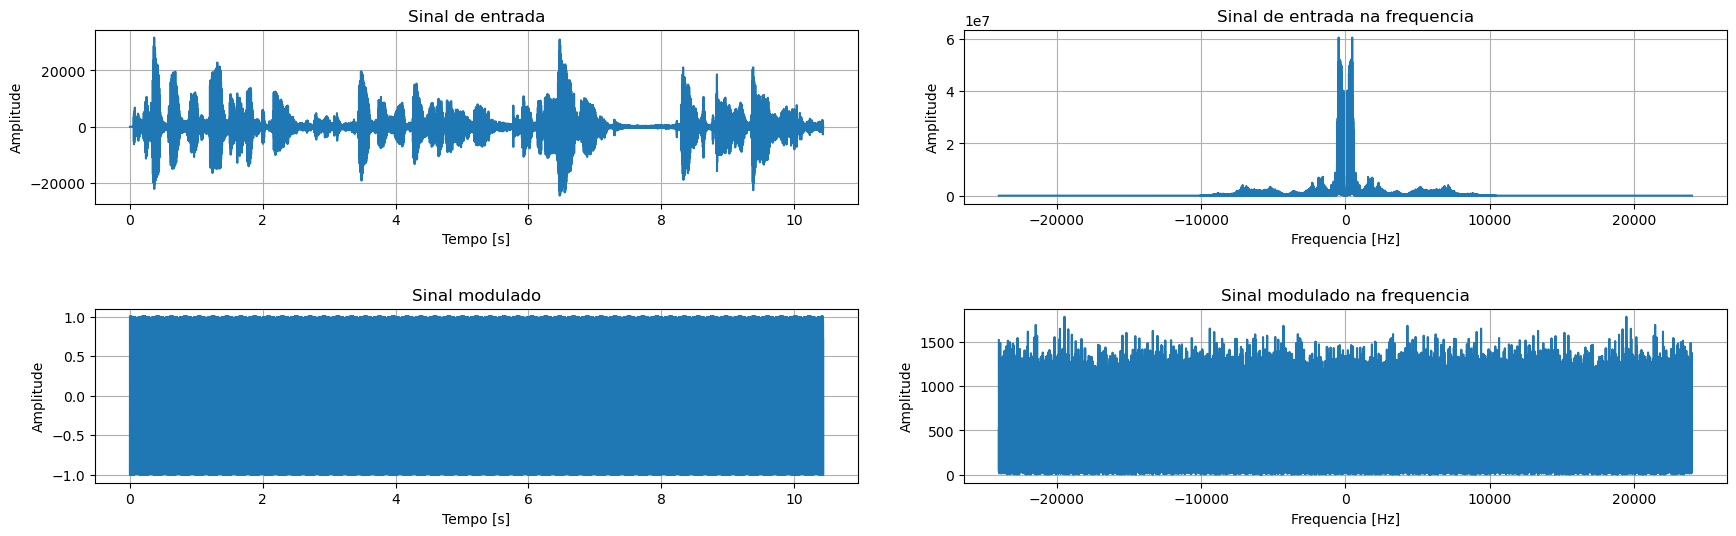

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(18, 6))

axs[0, 0].plot(t, si_t)
axs[0, 0].set_title("Sinal de entrada")
axs[0, 0].set_xlabel("Tempo [s]")
axs[0, 0].set_ylabel("Amplitude")

axs[0, 1].plot(f, np.abs(Si_f))
axs[0, 1].set_title("Sinal de entrada na frequencia")
axs[0, 1].set_xlabel("Frequencia [Hz]")
axs[0, 1].set_ylabel("Amplitude")

axs[1, 0].plot(t, c_t)
axs[1, 0].set_title("Sinal modulado")
axs[1, 0].set_xlabel("Tempo [s]")
axs[1, 0].set_ylabel("Amplitude")

axs[1, 1].plot(f, np.abs(C_f))
axs[1, 1].set_title("Sinal modulado na frequencia")
axs[1, 1].set_xlabel("Frequencia [Hz]")
axs[1, 1].set_ylabel("Amplitude")

plt.tight_layout(pad=3.0)
plt.show()